In [2]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

'1.6.0'

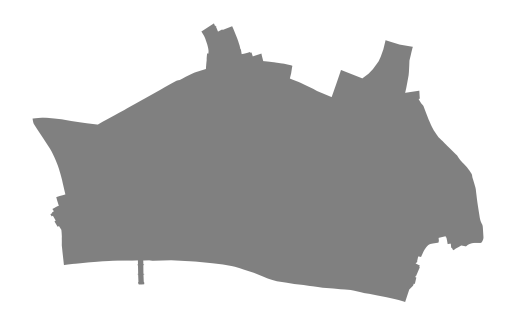

In [6]:
# get boundary 
city = ox.geocode_to_gdf("City of London")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")

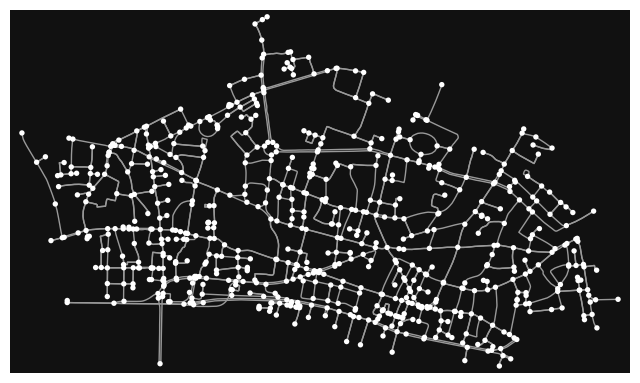

In [16]:
London_drive_networks = ox.graph_from_place("City of London",network_type = "drive")
fig, ax = ox.plot_graph(London_drive_networks)

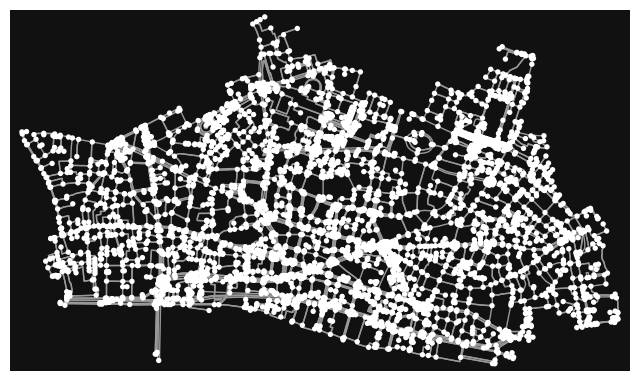

In [54]:
London_networks = ox.graph_from_place("City of London",network_type = "all_private")
fig, ax = ox.plot_graph(London_networks)

In [18]:
London_drive_gdf_nodes,London_drive_gdf_edgs = ox.graph_to_gdfs(London_drive_networks)
London_drive_gdf_edgs.head()

osmid lanes  ref  \
u      v          key                                                   
104318 7946372941 0                               57042810     2  A40   
       1360122917 0    [1068072016, 851939645, 1068072013]   NaN  A40   
       25509527   0               [1068072014, 1068072015]   NaN  NaN   
104321 24951853   0                             1190902283   NaN  NaN   
       24951854   0                                3713824   NaN  NaN   

                                  name       highway maxspeed  oneway  \
u      v          key                                                   
104318 7946372941 0    Holborn Viaduct       primary   20 mph   False   
       1360122917 0     Newgate Street       primary   20 mph   False   
       25509527   0         Old Bailey  unclassified   20 mph   False   
104321 24951853   0          Cheapside  unclassified   20 mph   False   
       24951854   0        Wood Street  unclassified   20 mph   False   

                      reversed   length  \
u      v          key                     
104318 7946372941 0       True    3.667   
       1360122917 0      False  107.654   
       25509527   0      False   24.883   
104321 24951853   0       True   19.820   
       24951854   0      False   54.048   

                                                                geometry  \
u      v          key                                                      
104318 7946372941 0    LINESTRING (-0.10192 51.51623, -0.10197 51.51625)   
       1360122917 0    LINESTRING (-0.10192 51.51623, -0.10185 51.516...   
       25509527   0    LINESTRING (-0.10192 51.51623, -0.10198 51.516...   
104321 24951853   0    LINESTRING (-0.09474 51.51422, -0.09446 51.51417)   
       24951854   0    LINESTRING (-0.09474 51.51422, -0.09471 51.514...   

                      access tunnel junction width bridge  
u      v          key                                      
104318 7946372941 0      NaN    NaN      NaN   NaN    NaN  
       1360122917 0      NaN    NaN      NaN   NaN    NaN  
       25509527   0      NaN    NaN      NaN   NaN    NaN  
104321 24951853   0      NaN    NaN      NaN   NaN    NaN  
       24951854   0      NaN    NaN      NaN   NaN    NaN

In [45]:
highway_type = [data["highway"] for u, v, key, data in London_networks.edges(keys=True, data=True)]
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique
highway_type = get_unique_numbers(highway_type)
highway_type
# 为什么有的Highway是list 

# tertiary（第三级道路）：城市支路，

# tertiary_link（第三级道路-连接）：匝道，机场集散车行道路（数据量极少，多是未知道路）

# residential（居住区道路）：居住区车行道路，

# unclassified（未分类道路）：居住区车行道路，滨水车行道路，机场机动车通道

# secondary（次要道路）：城市次要车行道路，机场外围车行道路，

# secondary_link（次要道路-连接）：城市次要车行道路立交、匝道（数据量少，部分零散分布未知类别）

# primary（主要道路）：城市主要车行道路

# primary_link（主要道路）：城市主要车行道路立交，城市主要车行道路匝道（数据量少，部分零散分布未知类别）

# motorway（高速公路）：高速公路，过江隧道

# motorway_link（高速公路-连接）：高速公路立交，匝道

# trunk（干道）：高架快速路，机场进站快速路，过江隧道，桥上快速路

# trunk_link（干道-连接）：立交，匝道，桥上引道，机场进站快速路，国道改道

# track（小路）：郊区、乡村、工矿区、田间、林间小路

# track_grade1（小路 级别1）：郊区、乡村、工矿区、田间、林间小路

# track_grade2（小路 级别2）：郊区、乡村、工矿区、田间、林间小路

# track_grade3（小路 级别3）：郊区、乡村、工矿区、田间、林间小路

# track_grade4（小路 级别4）：郊区、乡村、工矿区、田间、林间小路

# track_grade5（小路 级别5）：郊区、乡村、工矿区、田间、林间小路

# bridleway（马道）：体育场馆内部专用道路（数据量极少，零星道路在公园、居住区内部）

# living_street（生活街道）：居住区车行道路，公园车行道路

# path（小道）：公园车行道路，居住区车行道路（分布零碎，量少）

# service（服务性道路）：居住区车行道路，火车站集散车行道，公园车行道路，公共建筑集散车行道，公交枢纽入口车行道路，停车场入口车行道路

# footway（人行道）：滨水绿道，公园步行道，广场步行道，大学步行道路，人行道，火车站人行集散道路

# pedestrian（步行街道）：步行街，广场步行道路，公园步行道路，居住区步行道路

# steps（台阶踏步）：人行过街天桥台阶，广场台阶、公共建筑入口台阶，登山台阶

# cycleway（自行车道）：滨水绿道，非机动车道，公园自行车道

# unknown（未知道路）：滨水车行道路，校园广场车行道路，乡道（数据量少，比较难判别道路类型）

['primary',
 'unclassified',
 'footway',
 'tertiary',
 'residential',
 'trunk',
 'primary_link',
 'cycleway',
 'pedestrian',
 ['footway', 'pedestrian'],
 ['footway', 'steps'],
 'steps',
 ['unclassified', 'pedestrian'],
 'secondary',
 ['residential', 'cycleway'],
 'living_street',
 ['cycleway', 'unclassified'],
 ['cycleway', 'footway'],
 'service',
 ['residential', 'footway'],
 ['footway', 'path'],
 ['footway', 'service'],
 ['unclassified', 'service'],
 ['footway', 'pedestrian', 'path'],
 ['unclassified', 'footway'],
 ['pedestrian', 'service'],
 ['cycleway', 'unclassified', 'pedestrian'],
 'tertiary_link',
 ['residential', 'unclassified'],
 ['residential', 'pedestrian'],
 ['cycleway', 'unclassified', 'residential'],
 ['cycleway', 'residential'],
 ['cycleway', 'unclassified', 'service'],
 ['steps', 'footway', 'service'],
 ['cycleway', 'residential', 'pedestrian'],
 ['residential', 'steps'],
 ['unclassified', 'pedestrian', 'steps'],
 'track',
 'path',
 ['residential', 'service'],
 ['cycle

C:\Users\67483\AppData\Local\Temp\ipykernel_65936\3794373839.py:1: UserWarning: The buffer_dist argument as been deprecated and will be removed in a future release. Buffer your query area directly, if desired.
  London_networks = ox.graph_from_place("City of London",network_type = "drive",buffer_dist=200)
c:\Users\67483\.conda\envs\ox\Lib\site-packages\osmnx\graph.py:352: UserWarning: The buffer_dist argument as been deprecated and will be removed in a future release. Buffer your results directly, if desired.
  gdf_place = geocoder.geocode_to_gdf(


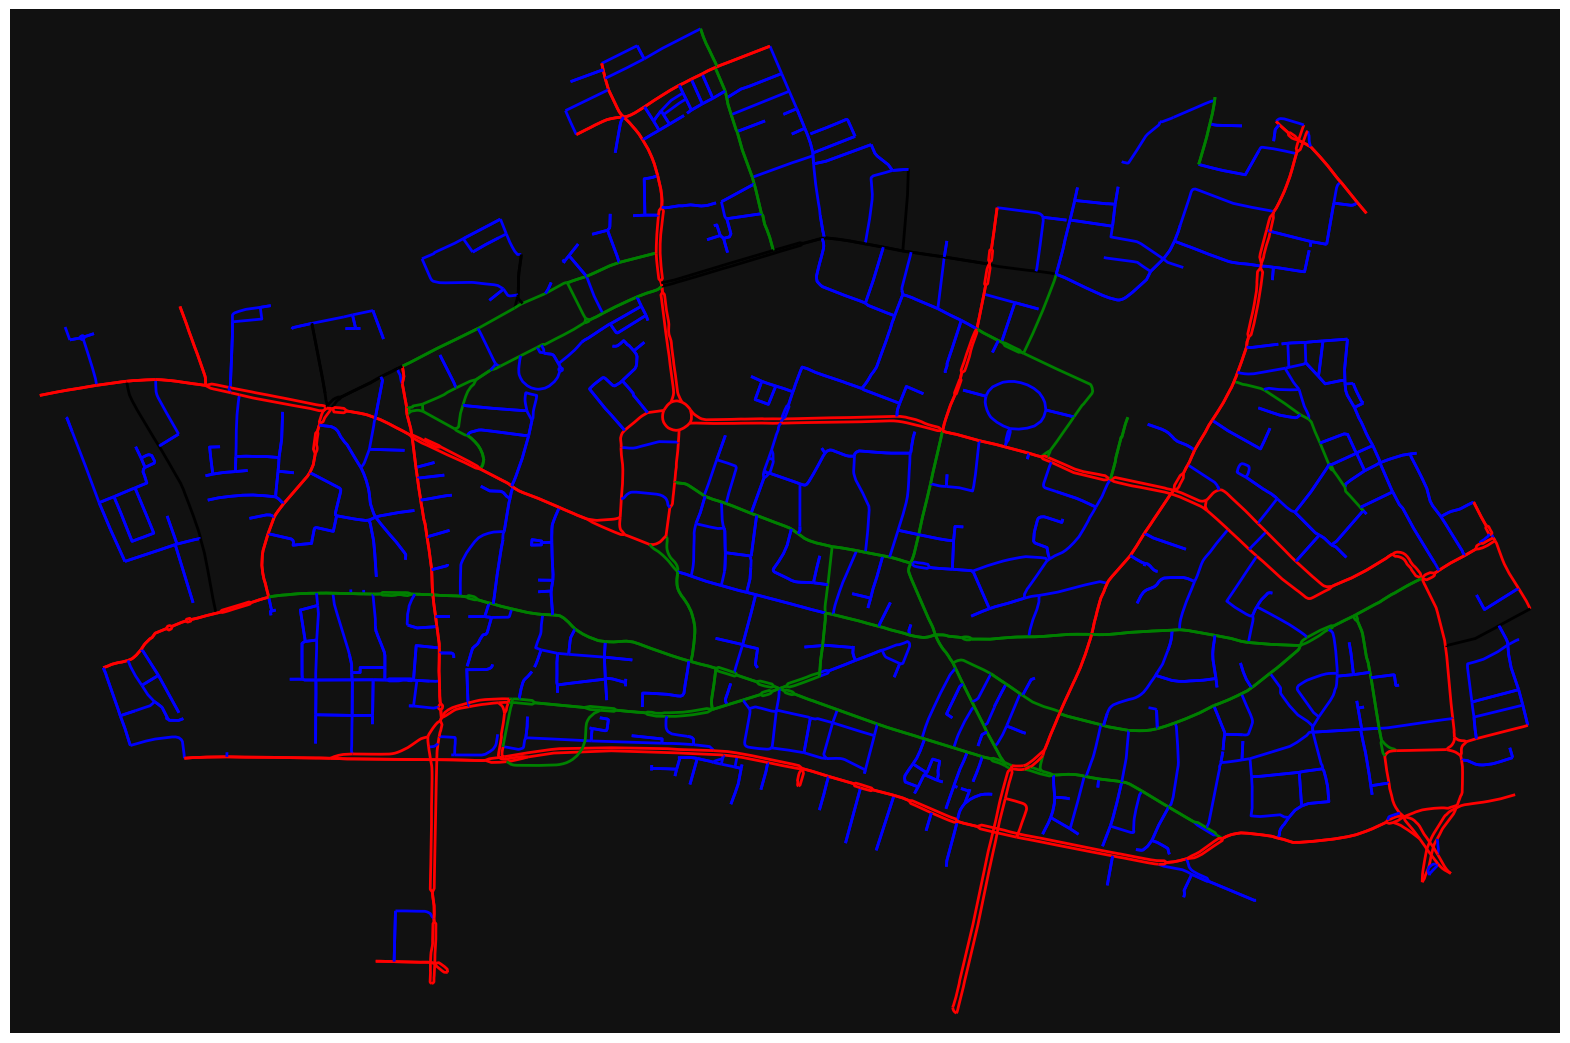

In [13]:
London_networks = ox.graph_from_place("City of London",network_type = "drive",buffer_dist=200)
ec = [] #["r" if data["highway"]=='primary' else "w" for u, v, key, data in London_drive_networks.edges(keys=True, data=True)]
for u, v, key, data in London_networks.edges(keys=True, data=True):
    if data["highway"] in ['primary','primary_link','trunk'] :
        ec.append("r")
    elif data["highway"]=='secondary':
        # ec.append("y")
        ec.append("black")
    elif data["highway"]=='tertiary':
        ec.append("g")
        # ec.append("black")
        
    elif data["highway"]=='unclassified':
        ec.append("b")  
        # ec.append("black")

    else:
        # ec.append("w")
        ec.append("b")

fig, ax = ox.plot_graph(
    London_networks,figsize=(20,20), node_size=0, edge_color=ec, edge_linewidth=2
)


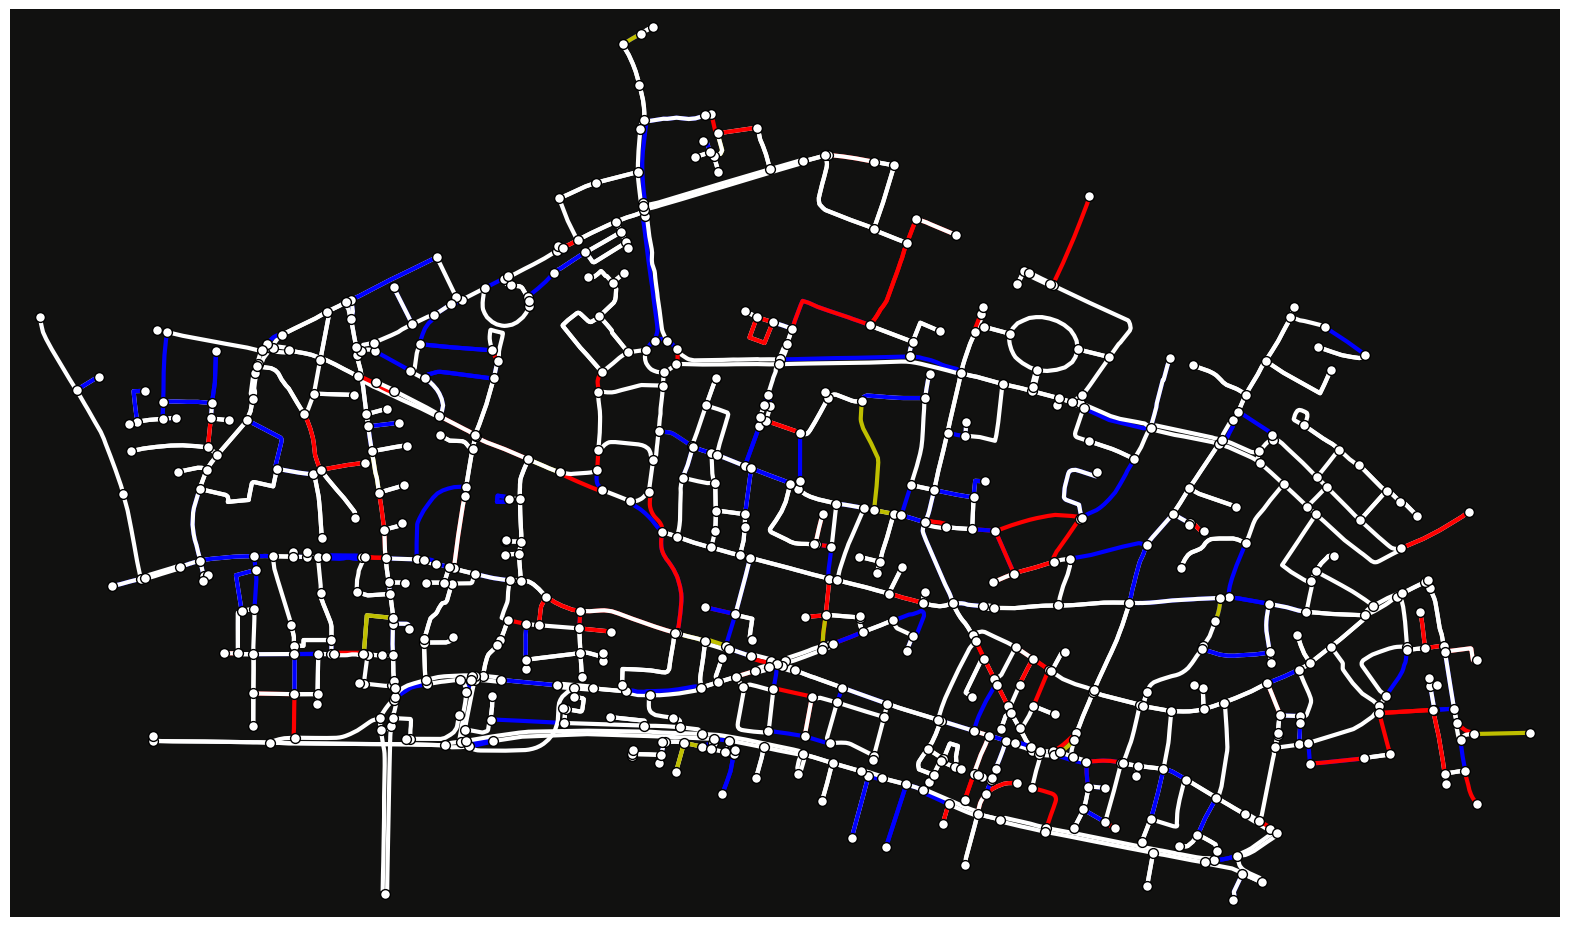

<Figure size 640x480 with 0 Axes>

In [56]:
London_networks = ox.graph_from_place("City of London",network_type = "drive",buffer_dist=200)
ec = [] #["r" if data["highway"]=='primary' else "w" for u, v, key, data in London_drive_networks.edges(keys=True, data=True)]
for u, v, key, data in London_networks.edges(keys=True, data=True):
    if data["highway"] in ['primary','primary_link','trunk'] :
        ec.append("r")
    elif data["highway"]=='secondary':
        # ec.append("y")
        ec.append("black")
    elif data["highway"]=='tertiary':
        ec.append("g")
        # ec.append("black")
        
    elif data["highway"]=='unclassified':
        ec.append("b")  
        # ec.append("black")

    else:
        # ec.append("w")
        ec.append("b")

fig, ax = ox.plot_graph(
    London_networks,figsize=(20,20), node_size=0, edge_color=ec, edge_linewidth=2
)
